In [1]:
import numpy as np
import os
import glob
import ntpath
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random


# Corremos los tests

In [2]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_15_segundos.txt 0.9 > ./resultados/test_15_segundos.txt.out 2> ./resultados/test_15_segundos.txt.time


In [67]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_30_segundos.txt 0.8 > ./resultados/test_30_segundos.txt.out


In [68]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_aleatorio.txt 0.85 > ./resultados/test_aleatorio.txt.out


In [69]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_aleatorio_desordenado.txt 0.76 > ./resultados/test_aleatorio_desordenado.txt.out


In [70]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_completo.txt 0.5 > ./resultados/test_completo.txt.out


In [73]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_trivial.txt 0.5 > ./resultados/test_trivial.txt.out


In [74]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_sin_links.txt 0.5 > ./resultados/test_sin_links.txt.out


In [76]:
def compare(docResults, ourResults):
    docResultsArr = [l.strip() for l in docResults]
    ourResultsArr = [l.strip() for l in ourResults]
    print(len(docResultsArr) == len(ourResultsArr))
    for i in range(len(docResultsArr)):
        print(i)
    

test_doc_path = '../tests_docentes/tests_tp1/'
for filename in glob.glob(os.path.join(test_doc_path, '*.txt.out')):
    with open(filename, encoding="utf-8") as docResults:
        basename = ntpath.basename(filename)
        with open('./resultados/'+basename) as ourResults:
            compare(docResults, ourResults)
        

True
0
1
True
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076

In [83]:
a = np.array([[ 1 , -0.283333 , -0.283333 , -0.283333 , 0 ]  , 
 [ 0 , 1 , 0 , 0 , 0 ]  , 
 [ -0.283333 , 0 , 1 , -0.283333 , 0 ]  , 
 [ -0.283333 , -0.283333 , -0.283333 , 1 , 0 ]  , 
 [ -0.283333 , -0.283333 , -0.283333 , -0.283333 , 1 ] ])
b = np.ones(5)
x = np.linalg.solve(a, b)
x
y = x / np.sum(x)
y

array([ 0.21930165,  0.07784444,  0.20211523,  0.21930165,  0.28143704])

In [13]:
def runProgram(p,input_file,out_path,out_path_time):
    !../cmake-build-debug/pageRank $input_file $p > $out_path 2> $out_path_time


test_doc_path = '../tests_docentes/tests_tp1/'
test_ours_path = './resultados/'
for filename in glob.glob(os.path.join(test_doc_path, '*.txt.out')):
    with open(filename, encoding="utf-8") as docResults:
        p = docResults.readline()
        out_path = test_ours_path + ntpath.basename(filename)
        out_path_time = our_path.replace('.out','.time')
        input_file = filename.replace('.out','')
        print(p + our_path + input_file)
        runProgram(p,input_file,out_path,out_path_time)
        
        
        
        
        

0.3
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_trivial.txt
3.431e-06;1.429e-06;5.18e-07;7.94e-07
0.3
1
0.9
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_15_segundos.txt
5.60706;1.75868;0.0629722;0.000350082
0.9
0.000476137
0.000808404
0.000477048
0.000911909
0.000394625
0.00046918
0.000334599
0.000426665
0.000791063
0.000765351
0.000287186
0.000400119
0.000286101
0.000661215
0.0005851
0.000410099
0.00054877
0.000494718
0.000578984
0.00037386
0.000708613
0.000570361
0.000665331
0.000568985
0.000483076
0.000467066
0.000853051
0.000883001
0.000869032
0.000680767
0.000889921
0.000616762
0.000423453
0.000434038
0.00051733
0.000663121
0.000501422
0.000675856
0.000379918
0.000755712
0.000644529
0.000232499
0.00055797
0.00082238
0.000500095
0.000492302
0.000640897
0.000359437
0.00106719
0.000586976
0.000836789
0.000506529
0.000766966
0.000461032
0.000396464
0.000410016
0.000492007
0.00101022
0.000622775
0.000459625
0.000755833
0.000554614
0.0010107
0.

0.64
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_sin_links.txt
5.7751e-05;4.4183e-05;8.194e-06;4.118e-06
0.64
0.2
0.2
0.2
0.2
0.2
0.5
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_completo.txt
0.000240016;0.00011003;0.000116888;5.79e-06
0.5
0.2
0.2
0.2
0.2
0.2
0.85
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_aleatorio.txt
9.497e-05;5.9572e-05;4.9028e-05;4.032e-06
0.85
0.220193
0.0793122
0.197721
0.220193
0.282581
0.8
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_30_segundos.txt
12.7941;3.87342;0.128551;0.000525738
0.8
0.000276029
0.000352836
0.00033496
0.000352229
0.000634891
0.000389497
0.000315478
0.000507262
0.00047441
0.000354173
0.000449128
0.000540477
0.000324307
0.00071928
0.00051386
0.000435127
0.000213864
0.000320267
0.000331802
0.000419796
0.00043544
0.000374516
0.000501527
0.000229889
0.000261392
0.000504797
0.000230558
0.000365034
0.000465549
0.000363383
0.000391745
0.000198467
0.000390116
0

0.76
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_aleatorio_desordenado.txt
2.4514e-05;1.4616e-05;1.2855e-05;1.1e-06
0.76
4.42908e-17
1.83745e-17
3.96359e-17
4.42908e-17
1


# Generamos matrices  W de tamaño y links variables

In [147]:
inputs_path = './inputs/'

def generateW(numberOfRows, percentageOfLinks):
    filename = inputs_path + str(numberOfRows) + "_" + str(percentageOfLinks) + ".txt"
    f = open(filename,"w+")
    
    f.write(str(numberOfRows) + '\n')
    numberOfLinks = int((numberOfRows**2) * percentageOfLinks)
    f.write(str(numberOfLinks) + '\n')
    
    for link in range(0,numberOfLinks):
        first = random.randint(1,numberOfRows)
        second = random.randint(1,numberOfRows)
        f.write(str(first) + " " + str(second) + "\n")
        
    
    f.close() 
    return filename


for i in range(20,401,20):
    for step in range(10,101,10):
        generateW(i, step/100)
        
        
        
        



# Corremos experimentos para ver cómo afecta a los tiempos variar el tamaño de una matriz para p fijo

In [154]:
results_path = "./results/"
pValue = 0.7

def refreshTimeResults():
    filename = results_path + "time"
    f = open(filename,"w+")
    f.write("Rows;Links;P;Multiplication_time;Adding_time;Gauss_time;Resolve_time \n")
    f.close()

refreshTimeResults()
for filename in glob.glob(os.path.join(inputs_path, '*.txt')):
    out_path = ntpath.basename(filename)
    param = "../experimentacion/inputs/"+out_path
    !../cmake-build-debug/pageRank $param $pValue

2.7484;0.020619;0.00128215;1.7854e-05
0
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.0031

0.00100152;0.00011076;2.0847e-05;2.933e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.000643188;8.0059e-05;2.0858e-05;2.645e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
2.45715;0.0194633;0.00128162;2.6755e-05
0
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0

0.458137;0.00599767;0.00042513;8.848e-06
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556


0.0109953;0.000475976;7.6394e-05;4.488e-06
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
1.71156;0.0107513;0.00163861;1.9004e-05
0
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.002

0.00183661;0.000206932;5.1658e-05;9.447e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.0366332;0.000910343;9.8584e-05;4.245e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
2.39259;0.0165077;0.00144109;1.7011e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.0029411

0.359058;0.00636115;0.000357893;1.1939e-05
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.0

0.133672;0.00202122;0.000267041;6.977e-06
0
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286

0.0122944;0.000527558;0.000262405;1.4039e-05
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
1.78837;0.0142935;0.00113756;1.4527e-05
0
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.0

0.0913372;0.000986783;0.000425561;8.688e-06
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.005555

0.414191;0.00494354;0.000522134;9.698e-06
0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.

1.59468;0.0135728;0.000994933;1.4219e-05
0
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143


0.597993;0.00599525;0.000735186;1.197e-05
0
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667

0.148332;0.00147716;0.000623944;1.0233e-05
0
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.0045454

0.777909;0.00864434;0.000863839;1.324e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615

4.03848;0.0232924;0.00197325;3.5924e-05
0
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025

5.65685;0.032781;0.00197972;2.3013e-05
0
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025


0.0515826;0.00129074;0.000191097;7.983e-06
0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.177895;0.00277767;0.000268198;6.94e-06
0
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.007

0.00790892;0.000450658;4.7424e-05;3.63e-06
0
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.0729931;0.000787421;0.000341261;1.3038e-05
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00

0.0315957;0.000648086;0.000105026;5.852e-06
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.571232;0.00389787;0.00161869;2.8097e-05
0
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.

3.08097;0.0220265;0.00143746;1.7622e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0

0.278014;0.00373033;0.00054363;1.4241e-05
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556

2.14088;0.0169034;0.00113289;2.5885e-05
0
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0

2.40651;0.0193737;0.00114758;2.6939e-05
0
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0

0.00252652;0.000218291;3.0185e-05;3.88e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.0348511;0.000716289;8.464e-05;4.602e-06
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.961901;0.00715587;0.00174215;2.3311e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.

0.044836;0.00101694;9.8718e-05;4.238e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.755797;0.0071961;0.000731026;1.4353e-05
0
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0

1.94607;0.0159131;0.000998412;1.6283e-05
0
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143


2.04872;0.0147953;0.00145278;1.837e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.

1.3012;0.0116213;0.000948764;1.2332e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0

0.109778;0.00202343;0.000372921;2.0186e-05
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.0

0.15192;0.00283817;0.000201528;5.762e-06
0
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333


0.35706;0.00504041;0.000350792;9.691e-06
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.006

3.26506;0.0209739;0.00178699;2.1684e-05
0
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0

0.00854572;0.000268875;0.000132542;5.371e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
1.04217;0.00962852;0.000861207;1.3203e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.003846

0.151895;0.00185026;0.000425695;8.498e-06
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556

1.16545;0.01062;0.000861766;1.2159e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.

0.275082;0.00417381;0.000375426;9.056e-06
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00

1.11226;0.00747361;0.00199931;2.7594e-05
0
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778


0.508916;0.00751787;0.000667418;1.577e-05
0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.

0.946584;0.00812397;0.000994573;1.3573e-05
0
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.0035714

0.13366;0.00239585;0.000194728;7.316e-06
0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.0604946;0.00164795;0.000125942;5.986e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125

0.583869;0.0062045;0.000786635;1.2985e-05
0
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545

3.333;0.0234015;0.00144161;3.0004e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.0

0.0672916;0.0012242;0.000146344;4.89e-06
0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
2.79081;0.016924;0.00196685;3.4032e-05
0
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0

0.560263;0.0063377;0.000520648;1.0327e-05
0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.

# Graficamos

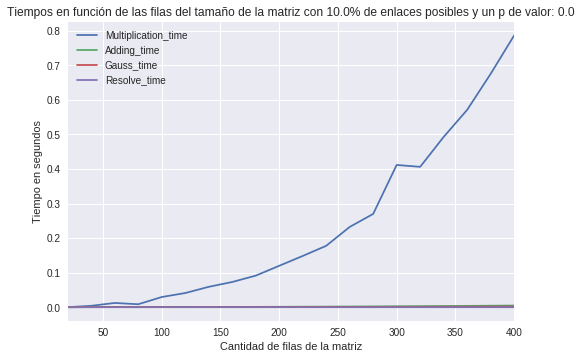

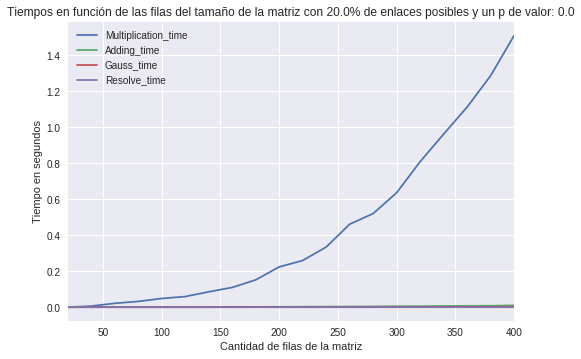

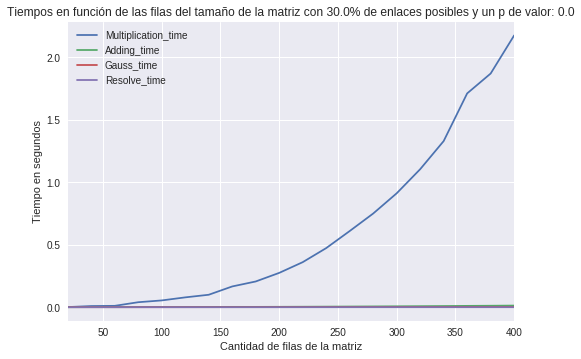

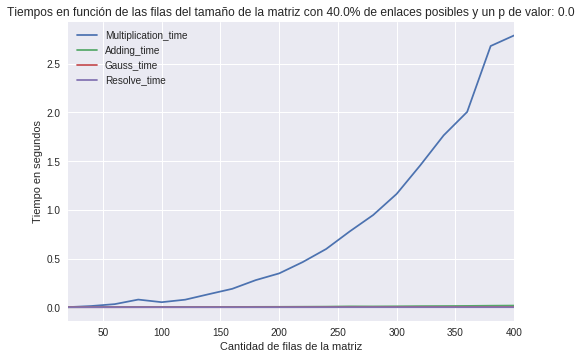

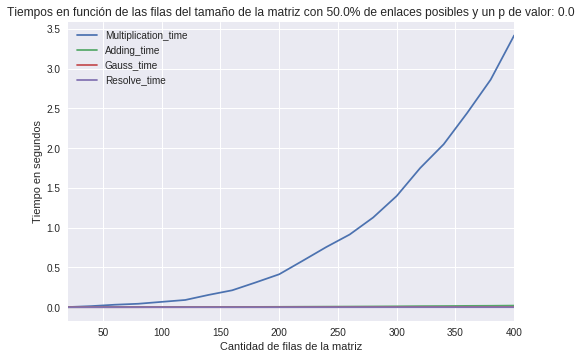

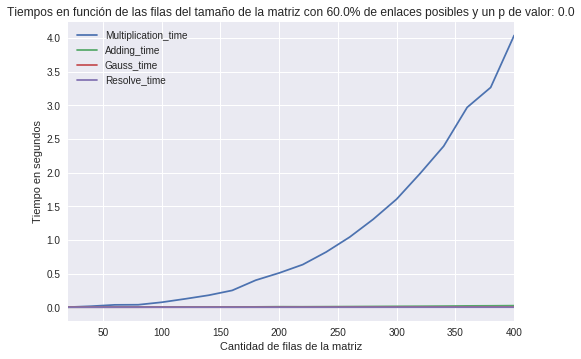

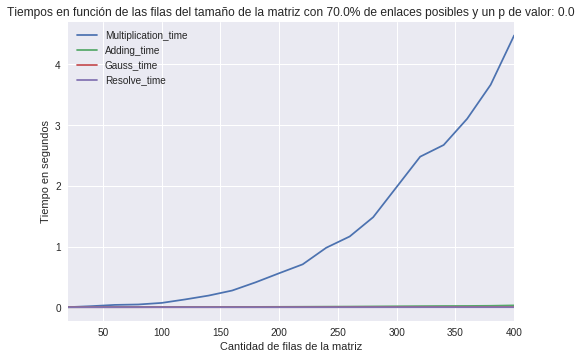

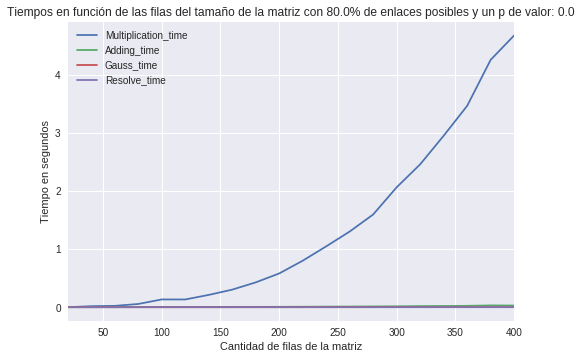

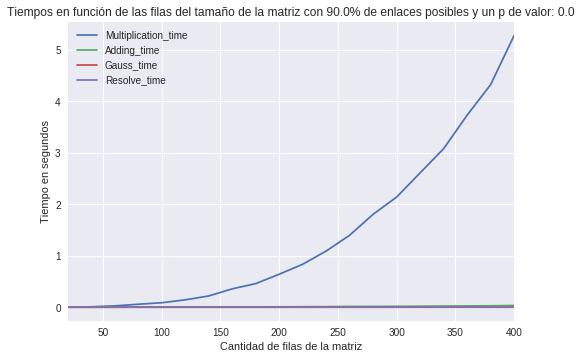

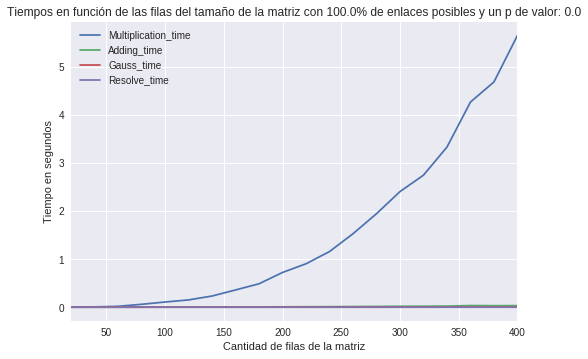

In [157]:
def plotRows(percentageOfNonZeroValues,pValue):

    df = pd.read_csv(results_path+"time", delimiter=";")

    df = df[df.Links == df.Rows ** 2 * percentageOfNonZeroValues]

    df = df.drop('Links',axis=1)
    df = df.drop('P', axis = 1)

    df = df.sort_values("Rows")


    ax = df.plot(x="Rows", logy=False)
    ax.set_ylabel("Tiempo en segundos")
    ax.set_xlabel("Cantidad de filas de la matriz")
    title = "Tiempos en función de las filas del tamaño de la matriz con "+str(percentageOfNonZeroValues*100)+"% de enlaces posibles y un p de valor: " +str(pValue) 
    plt.title(title)
    plt.title(title)
    plt.show()

for i in range(1,11,1):
    plotRows(i/10, pValue)


# Calculemos como afecta a los tiempos variar P

In [10]:
results_path = "./results/"
inputs_path = './inputs/'

matrix_size = 360
def refreshTimeResults():
    filename = results_path + "time"
    f = open(filename,"w+")
    f.write("Rows;Links;P;Multiplication_time;Adding_time;Gauss_time;Resolve_time \n")
    f.close()

refreshTimeResults()

for filename in glob.glob(os.path.join(inputs_path, str(matrix_size)+'_1.0.txt')):
    out_path = ntpath.basename(filename)
    param = "../experimentacion/inputs/"+out_path
    for pValue in range(1,101,1):
        pValue = pValue /100        
        !../cmake-build-debug/pageRank $param $pValue

4.0149;0.0919954;3.15946;0.00233715
0.01
0.0027791
0.00277712
0.00277641
0.00277688
0.0027761
0.0027756
0.00277869
0.00277854
0.00277723
0.00277588
0.00277669
0.00277589
0.00277683
0.0027792
0.00277756
0.00277695
0.00277889
0.00277647
0.00277667
0.00277856
0.00277557
0.00277739
0.00277822
0.00277684
0.00277897
0.00277808
0.00277902
0.00277785
0.0027764
0.00277906
0.00277808
0.00277746
0.00277664
0.00277878
0.0027792
0.00277647
0.00277879
0.0027776
0.00277836
0.00277625
0.00277711
0.00277626
0.00277777
0.00277493
0.00277994
0.00277751
0.00277698
0.00277754
0.00277801
0.00277914
0.00277818
0.00277911
0.00277868
0.00277738
0.00277678
0.00277827
0.00277839
0.00277833
0.00277746
0.00277813
0.00277809
0.00277678
0.00277812
0.00277853
0.00277659
0.0027781
0.00277759
0.00277858
0.00277937
0.00277844
0.00277736
0.00277849
0.00277641
0.00277615
0.00277852
0.0027785
0.0027765
0.00277867
0.00277828
0.00277979
0.00277771
0.00277846
0.0027771
0.00277752
0.00277822
0.00277537
0.00277747
0.00277875
0.

3.95305;0.0939071;3.07385;0.00228255
0.04
0.00278346
0.00277557
0.00277272
0.00277459
0.00277147
0.00276945
0.0027818
0.00278121
0.00277595
0.00277057
0.00277384
0.00277059
0.00277435
0.00278386
0.00277727
0.00277485
0.00278258
0.00277293
0.00277369
0.00278129
0.00276931
0.00277656
0.0027799
0.00277438
0.00278285
0.00277929
0.00278308
0.00277837
0.00277257
0.00278321
0.00277931
0.00277683
0.00277355
0.00278208
0.00278382
0.00277289
0.00278213
0.00277738
0.00278037
0.00277196
0.0027754
0.00277199
0.00277803
0.00276666
0.0027867
0.00277698
0.00277484
0.0027771
0.00277899
0.00278347
0.00277963
0.00278335
0.00278164
0.00277646
0.00277401
0.00277995
0.00278045
0.00278025
0.00277672
0.00277943
0.00277925
0.00277398
0.00277933
0.00278104
0.00277326
0.00277927
0.00277721
0.0027812
0.00278433
0.00278064
0.00277631
0.00278086
0.00277244
0.00277147
0.00278093
0.00278088
0.00277284
0.00278153
0.00277995
0.00278599
0.00277771
0.00278065
0.00277525
0.0027769
0.00277967
0.0027683
0.00277669
0.0027818

3.90589;0.0931529;3.07501;0.00224402
0.07
0.00278847
0.00277466
0.00276965
0.00277293
0.00276744
0.00276392
0.00278552
0.0027845
0.00277524
0.00276583
0.00277159
0.00276589
0.00277246
0.00278907
0.00277754
0.00277334
0.00278683
0.00276998
0.00277122
0.00278458
0.0027636
0.00277624
0.00278214
0.00277245
0.00278722
0.002781
0.00278765
0.0027794
0.00276921
0.00278783
0.002781
0.00277669
0.00277097
0.00278585
0.00278895
0.00276981
0.00278594
0.00277767
0.00278282
0.00276812
0.00277414
0.00276814
0.00277871
0.00275881
0.00279389
0.00277684
0.00277308
0.00277711
0.00278038
0.0027882
0.00278147
0.00278797
0.00278501
0.00277594
0.00277159
0.00278199
0.00278289
0.00278257
0.00277634
0.00278108
0.00278078
0.00277151
0.00278085
0.00278395
0.00277029
0.00278078
0.00277713
0.00278417
0.00278956
0.00278319
0.00277556
0.00278354
0.00276871
0.00276706
0.00278365
0.00278359
0.00276946
0.0027847
0.00278187
0.00279245
0.00277798
0.00278309
0.00277372
0.00277652
0.00278132
0.00276147
0.00277617
0.00278523

3.95118;0.0982778;3.05864;0.0023742
0.1
0.00279414
0.0027744
0.00276723
0.00277191
0.00276402
0.00275902
0.00278986
0.00278841
0.00277514
0.00276168
0.00276997
0.00276181
0.00277115
0.00279488
0.00277837
0.00277244
0.00279166
0.00276762
0.00276927
0.00278845
0.00275848
0.00277646
0.00278496
0.00277109
0.00279209
0.00278322
0.00279275
0.00278094
0.00276631
0.00279296
0.00278319
0.00277705
0.00276891
0.00279011
0.00279462
0.00276726
0.00279025
0.00277847
0.00278572
0.00276476
0.00277336
0.00276473
0.00277984
0.0027514
0.00280153
0.00277712
0.00277171
0.00277758
0.0027822
0.00279334
0.00278372
0.00279298
0.00278881
0.00277585
0.00276954
0.00278438
0.0027857
0.00278531
0.00277631
0.00278309
0.00278269
0.00276939
0.00278268
0.00278728
0.00276769
0.00278264
0.00277737
0.00278749
0.00279509
0.00278612
0.00277513
0.00278657
0.00276522
0.00276296
0.00278668
0.00278664
0.00276638
0.00278818
0.00278405
0.00279917
0.00277856
0.00278579
0.0027725
0.00277641
0.00278317
0.00275489
0.00277591
0.002788

3.9463;0.0949274;3.09147;0.00235711
0.13
0.00280049
0.00277483
0.00276548
0.00277156
0.00276123
0.00275477
0.00279484
0.00279296
0.00277565
0.00275814
0.002769
0.00275836
0.00277046
0.00280128
0.00277979
0.00277217
0.00279708
0.00276588
0.00276788
0.00279292
0.00275395
0.00277723
0.00278837
0.0027703
0.00279749
0.00278597
0.0027984
0.00278302
0.00276392
0.0027986
0.00278589
0.00277794
0.00276739
0.00279488
0.00280085
0.00276525
0.00279506
0.00277981
0.0027891
0.00276188
0.00277306
0.00276178
0.00278142
0.00274446
0.00280963
0.00277784
0.00277076
0.00277853
0.00278448
0.00279891
0.0027864
0.00279842
0.00279303
0.0027762
0.00276788
0.00278716
0.00278892
0.00278848
0.00277666
0.00278549
0.00278499
0.00276762
0.00278485
0.00279104
0.00276547
0.00278488
0.00277795
0.00279119
0.00280092
0.00278942
0.00277503
0.00278995
0.00276199
0.00275917
0.00279005
0.00279005
0.00276362
0.00279201
0.00278651
0.00280618
0.00277945
0.00278876
0.00277162
0.00277657
0.00278524
0.00274859
0.00277593
0.00279284

3.85022;0.0910567;3.04949;0.00222201
0.16
0.00280754
0.00277594
0.00276441
0.0027719
0.00275909
0.0027512
0.00280048
0.00279818
0.00277679
0.00275522
0.00276871
0.00275556
0.00277041
0.0028083
0.00278183
0.00277254
0.00280311
0.00276477
0.00276705
0.00279799
0.00275004
0.00277857
0.0027924
0.00277011
0.00280343
0.00278928
0.0028046
0.00278566
0.00276205
0.00280478
0.00278911
0.00277938
0.00276643
0.00280018
0.00280764
0.00276379
0.00280039
0.0027817
0.00279296
0.0027595
0.00277327
0.00275929
0.00278349
0.002738
0.00281821
0.002779
0.00277024
0.00277998
0.00278722
0.00280493
0.00278953
0.00280428
0.00279772
0.002777
0.00276662
0.00279033
0.00279256
0.0027921
0.00277741
0.0027883
0.0027877
0.00276622
0.00278737
0.00279525
0.00276366
0.00278749
0.00277888
0.00279528
0.00280707
0.00279312
0.00277528
0.00279369
0.00275902
0.00275571
0.00279378
0.00279383
0.00276119
0.00279619
0.00278925
0.00281349
0.00278066
0.00279202
0.00277109
0.00277702
0.00278754
0.00274258
0.00277624
0.00279709
0.0028

3.97136;0.0935685;3.08757;0.00339796
0.19
0.00281532
0.00277778
0.00276405
0.00277295
0.00275762
0.00274832
0.00280681
0.00280408
0.00277859
0.00275295
0.0027691
0.00275344
0.002771
0.00281596
0.0027845
0.0027736
0.00280979
0.00276432
0.00276683
0.00280371
0.00274676
0.0027805
0.00279706
0.00277052
0.00280995
0.00279315
0.0028114
0.00278886
0.00276071
0.00281152
0.0027929
0.00278137
0.00276604
0.00280603
0.00281502
0.0027629
0.00280627
0.00278416
0.00279734
0.00275765
0.00277401
0.0027573
0.00278606
0.00273203
0.00282729
0.00278064
0.00277018
0.00278195
0.00279046
0.00281142
0.00279313
0.00281061
0.00280288
0.00277828
0.00276579
0.00279391
0.00279664
0.00279618
0.00277857
0.00279152
0.00279085
0.00276522
0.00279026
0.00279992
0.00276227
0.00279052
0.00278018
0.00279978
0.00281357
0.00279725
0.0027759
0.00279783
0.00275635
0.0027526
0.00279786
0.00279801
0.00275911
0.00280075
0.00279231
0.00282112
0.00278222
0.0027956
0.00277093
0.00277777
0.0027901
0.00273687
0.00277686
0.00280167
0.00

3.92755;0.091362;3.04658;0.00227339
0.22
0.00282385
0.00278035
0.00276442
0.00277472
0.00275685
0.00274616
0.00281386
0.00281068
0.00278106
0.00275136
0.00277021
0.00275203
0.00277227
0.00282428
0.00278784
0.00277534
0.00281712
0.00276454
0.00276721
0.00281007
0.00274414
0.00278304
0.00280239
0.00277157
0.00281705
0.00279762
0.00281879
0.00279267
0.00275994
0.00281885
0.00279725
0.00278395
0.00276624
0.00281245
0.00282302
0.0027626
0.0028127
0.00278721
0.00280224
0.00275634
0.00277529
0.00275583
0.00278915
0.00272658
0.00283689
0.00278277
0.00277058
0.00278446
0.0027942
0.0028184
0.00279722
0.0028174
0.00280853
0.00278005
0.00276541
0.00279794
0.00280119
0.00280076
0.00278015
0.00279517
0.00279444
0.00276463
0.00279355
0.00280507
0.00276131
0.00279396
0.00278186
0.00280471
0.00282043
0.00280181
0.00277691
0.00280236
0.00275398
0.00274986
0.00280234
0.00280259
0.0027574
0.0028057
0.00279569
0.00282908
0.00278414
0.0027995
0.00277115
0.00277885
0.00279292
0.00273149
0.00277781
0.00280658

3.95765;0.0930504;3.06046;0.00222536
0.25
0.00283315
0.00278368
0.00276555
0.00277725
0.00275678
0.00274474
0.00282163
0.00281801
0.00278423
0.00275046
0.00277205
0.00275133
0.00277424
0.00283327
0.00279186
0.00277781
0.00282512
0.00276547
0.00276825
0.0028171
0.0027422
0.00278621
0.0028084
0.00277328
0.00282477
0.00280269
0.00282682
0.00279709
0.00275976
0.00282678
0.0028022
0.00278713
0.00276706
0.00281946
0.00283164
0.00276292
0.00281971
0.00279086
0.0028077
0.00275559
0.00277715
0.00275488
0.00279278
0.00272167
0.00284703
0.00278541
0.00277148
0.00278752
0.00279848
0.00282589
0.00280184
0.00282469
0.00281469
0.00278234
0.00276549
0.00280242
0.00280621
0.00280584
0.00278218
0.00279928
0.00279851
0.00276446
0.00279724
0.00281071
0.00276081
0.00279784
0.00278395
0.00281008
0.00282768
0.00280682
0.00277832
0.00280731
0.00275192
0.0027475
0.00280722
0.00280761
0.00275607
0.00281105
0.00279942
0.00283739
0.00278644
0.00280374
0.00277176
0.00278027
0.00279602
0.00272645
0.0027791
0.002811

3.94999;0.0912181;3.0215;0.00230436
0.28
0.00284326
0.00278779
0.00276745
0.00278056
0.00275744
0.00274408
0.00283016
0.00282607
0.00278812
0.00275028
0.00277466
0.00275139
0.00277693
0.00284296
0.00279659
0.00278103
0.00283384
0.00276711
0.00276994
0.00282483
0.00274096
0.00279003
0.00281511
0.00277565
0.00283313
0.00280841
0.00283549
0.00280216
0.00276019
0.00283535
0.00280777
0.00279094
0.0027685
0.00282709
0.0028409
0.00276386
0.00282731
0.00279514
0.00281372
0.00275542
0.00277958
0.00275449
0.00279698
0.00271732
0.00285774
0.00278859
0.00277289
0.00279115
0.00280331
0.00283391
0.00280699
0.0028325
0.00282139
0.00278517
0.00276607
0.00280738
0.00281173
0.00281146
0.00278468
0.00280387
0.00280306
0.00276474
0.00280137
0.00281687
0.00276078
0.00280217
0.00278646
0.00281593
0.00283532
0.00281232
0.00278016
0.0028127
0.00275021
0.00274555
0.00281251
0.00281307
0.00275515
0.00281684
0.0028035
0.00284607
0.00278913
0.00280834
0.0027728
0.00278205
0.00279942
0.00272177
0.00278075
0.002817

3.92178;0.0908344;3.00923;0.00223883
0.31
0.00285419
0.00279272
0.00277015
0.00278467
0.00275885
0.00274421
0.00283948
0.00283491
0.00279275
0.00275083
0.00277805
0.00275223
0.00278037
0.00285336
0.00280206
0.00278501
0.00284327
0.0027695
0.00277234
0.00283327
0.00274044
0.00279453
0.00282256
0.00277872
0.00284216
0.00281478
0.00284484
0.00280789
0.00276126
0.00284459
0.00281399
0.00279538
0.0027706
0.00283536
0.00285085
0.00276544
0.00283553
0.00280007
0.00282035
0.00275585
0.00278263
0.00275468
0.00280176
0.00271355
0.00286904
0.00279233
0.00277485
0.00279539
0.00280872
0.00284249
0.00281271
0.00284085
0.00282864
0.00278855
0.00276717
0.00281284
0.00281778
0.00281762
0.00278766
0.00280895
0.00280812
0.00276549
0.00280596
0.00282356
0.00276126
0.00280699
0.00278942
0.00282227
0.00284339
0.00281831
0.00278244
0.00281854
0.00274885
0.00274402
0.00281826
0.00281901
0.00275466
0.00282309
0.00280796
0.00285515
0.00279224
0.00281334
0.00277426
0.0027842
0.00280313
0.00271748
0.00278277
0.00

3.88832;0.0943679;3.00616;0.00225111
0.34
0.00286598
0.00279847
0.00277368
0.00278961
0.00276104
0.00274515
0.0028496
0.00284453
0.00279814
0.00275216
0.00278226
0.00275388
0.00278457
0.00286451
0.00280829
0.0027898
0.00285346
0.00277265
0.00277545
0.00284245
0.00274068
0.00279973
0.00283076
0.00278251
0.00285188
0.00282184
0.00285488
0.0028143
0.00276299
0.00285451
0.00282087
0.0028005
0.00277338
0.0028443
0.00286148
0.0027677
0.00284438
0.00280566
0.00282759
0.00275691
0.00278632
0.00275547
0.00280716
0.00271039
0.00288094
0.00279665
0.00277736
0.00280025
0.00281474
0.00285165
0.00281903
0.00284976
0.00283647
0.00279251
0.00276881
0.00281883
0.00282439
0.00282436
0.00279115
0.00281455
0.00281371
0.00276673
0.00281103
0.00283081
0.00276224
0.00281231
0.00279284
0.00282912
0.00285192
0.00282483
0.00278518
0.00282486
0.00274786
0.00274293
0.00282446
0.00282543
0.00275461
0.00282981
0.00281283
0.00286464
0.00279579
0.00281874
0.00277618
0.00278674
0.00280717
0.0027136
0.0027852
0.0028298

4.02509;0.0911213;3.09022;0.00273069
0.37
0.00287866
0.00280508
0.00277807
0.00279541
0.00276403
0.00274693
0.00286056
0.00285497
0.00280433
0.00275428
0.00278731
0.00275635
0.00278957
0.00287641
0.00281532
0.00279541
0.00286443
0.0027766
0.00277932
0.00285238
0.00274168
0.00280565
0.00283975
0.00278705
0.00286233
0.00282961
0.00286564
0.00282144
0.00276541
0.00286515
0.00282846
0.0028063
0.00277686
0.00285393
0.00287283
0.00277064
0.00285389
0.00281195
0.00283547
0.00275862
0.00279066
0.00275689
0.00281319
0.00270786
0.00289348
0.00280158
0.00278046
0.00280575
0.00282138
0.00286141
0.00282598
0.00285926
0.0028449
0.00279708
0.00277102
0.00282537
0.00283157
0.0028317
0.00279517
0.00282069
0.00281985
0.00276847
0.00281661
0.00283862
0.00276377
0.00281815
0.00279675
0.00283651
0.00286091
0.00283189
0.00278842
0.00283167
0.00274727
0.00274231
0.00283115
0.00283237
0.00275504
0.00283704
0.00281811
0.00287457
0.00279979
0.00282457
0.00277858
0.00278971
0.00281157
0.00271015
0.00278804
0.002

4.04315;0.090859;3.03957;0.00227733
0.4
0.00289225
0.00281257
0.00278334
0.00280209
0.00276785
0.00274958
0.00287239
0.00286625
0.00281133
0.00275723
0.00279324
0.00275969
0.00279539
0.0028891
0.00282317
0.00280188
0.00287621
0.00278136
0.00278396
0.0028631
0.00274349
0.00281231
0.00284955
0.00279235
0.00287352
0.00283812
0.00287715
0.00282931
0.00276856
0.00287654
0.00283676
0.00281283
0.00278105
0.00286428
0.00288492
0.00277429
0.00286408
0.00281895
0.00284403
0.00276099
0.00279569
0.00275895
0.00281989
0.00270598
0.00290669
0.00280714
0.00278417
0.00281192
0.00282867
0.00287181
0.00283358
0.00286938
0.00285395
0.00280228
0.00277383
0.00283248
0.00283935
0.00283965
0.00279974
0.0028274
0.00282657
0.00277075
0.00282272
0.00284703
0.00276586
0.00282453
0.00280116
0.00284446
0.0028704
0.00283952
0.00279217
0.00283899
0.00274709
0.00274218
0.00283834
0.00283985
0.00275596
0.00284479
0.00282383
0.00288495
0.00280426
0.00283085
0.00278147
0.00279311
0.00281635
0.00270715
0.00279133
0.00284

3.85201;0.0910173;3.00229;0.00227022
0.43
0.00290679
0.00282097
0.00278953
0.00280968
0.00277252
0.00275312
0.00288512
0.0028784
0.00281918
0.00276102
0.00280006
0.00276393
0.00280206
0.0029026
0.00283188
0.00280924
0.00288881
0.00278697
0.00278942
0.00287463
0.00274612
0.00281975
0.00286019
0.00279844
0.0028855
0.00284739
0.00288943
0.00283795
0.00277246
0.00288871
0.00284582
0.00282009
0.002786
0.00287538
0.00289777
0.00277868
0.00287497
0.00282668
0.00285328
0.00276407
0.00280142
0.0027617
0.00282727
0.00270479
0.00292058
0.00281337
0.00278852
0.00281879
0.00283665
0.00288286
0.00284186
0.00288014
0.00286365
0.00280813
0.00277727
0.00284019
0.00284776
0.00284826
0.00280488
0.00283469
0.0028339
0.00277358
0.00282939
0.00285605
0.00276854
0.00283149
0.00280611
0.002853
0.00288042
0.00284776
0.00279646
0.00284685
0.00274734
0.00274257
0.00284607
0.00284789
0.0027574
0.00285309
0.00283002
0.00289582
0.00280924
0.00283762
0.00278488
0.00279698
0.00282151
0.00270464
0.00279508
0.00285168


4.27614;0.101211;3.17914;0.00300116
0.46
0.00292231
0.00283031
0.00279666
0.00281821
0.00277806
0.00275758
0.00289877
0.00289143
0.00282789
0.00276569
0.00280782
0.00276909
0.00280961
0.00291693
0.00284148
0.00281751
0.00290228
0.00279346
0.00279572
0.002887
0.0027496
0.00282799
0.00287171
0.00280535
0.00289829
0.00285745
0.00290252
0.00284739
0.00277715
0.00290169
0.00285567
0.00282811
0.00279171
0.00288726
0.00291142
0.00278382
0.00288658
0.00283518
0.00286325
0.00276786
0.00280789
0.00276515
0.00283537
0.0027043
0.00293518
0.00282028
0.00279354
0.00282638
0.00284534
0.00289459
0.00285087
0.00289157
0.00287403
0.00281466
0.00278136
0.00284854
0.00285684
0.00285755
0.00281062
0.00284259
0.00284185
0.00277699
0.00283665
0.00286571
0.00277183
0.00283904
0.00281162
0.00286216
0.00289099
0.00285661
0.00280132
0.00285528
0.00274806
0.0027435
0.00285435
0.00285653
0.00275938
0.00286198
0.0028367
0.0029072
0.00281475
0.00284489
0.00278882
0.00280133
0.0028271
0.00270263
0.00279932
0.00285986

4.11556;0.0915818;3.21004;0.00230721
0.49
0.00293884
0.00284062
0.00280476
0.00282773
0.0027845
0.00276301
0.00291339
0.00290539
0.00283751
0.00277127
0.00281655
0.00277522
0.00281807
0.00293212
0.00285201
0.00282674
0.00291665
0.00280086
0.0028029
0.00290022
0.00275397
0.00283706
0.00288413
0.00281311
0.00291193
0.00286834
0.00291643
0.00285766
0.00278265
0.00291553
0.00286633
0.00283693
0.00279822
0.00289995
0.00292588
0.00278975
0.00289894
0.00284446
0.00287398
0.00277241
0.00281513
0.00276933
0.00284422
0.00270456
0.00295053
0.00282791
0.00279925
0.00283471
0.00285477
0.00290704
0.00286063
0.0029037
0.00288512
0.0028219
0.00278615
0.00285754
0.0028666
0.00286754
0.00281698
0.00285114
0.00285046
0.00278101
0.00284452
0.00287602
0.00277576
0.00284722
0.00281772
0.00287196
0.00290214
0.00286613
0.00280677
0.00286428
0.00274925
0.00274499
0.00286322
0.00286578
0.00276194
0.00287147
0.00284389
0.00291911
0.0028208
0.0028527
0.00279334
0.00280619
0.00283313
0.00270116
0.00280407
0.002868

4.0755;0.0949669;3.19303;0.00231834
0.52
0.00295642
0.00285193
0.00281387
0.00283825
0.00279188
0.00276942
0.00292899
0.0029203
0.00284806
0.0027778
0.00282628
0.00278234
0.00282746
0.0029482
0.00286349
0.00283696
0.00293193
0.00280919
0.00281099
0.00291434
0.00275926
0.00284699
0.00289748
0.00282174
0.00292645
0.00288008
0.00293121
0.00286879
0.00278901
0.00293024
0.00287784
0.00284658
0.00280556
0.00291348
0.00294119
0.00279648
0.00291207
0.00285456
0.00288548
0.00277773
0.00282317
0.00277428
0.00285385
0.00270558
0.00296666
0.00283629
0.0028057
0.00284383
0.00286498
0.00292024
0.00287118
0.00291656
0.00289693
0.00282989
0.00279166
0.00286724
0.00287709
0.00287826
0.00282399
0.00286035
0.00285975
0.00278566
0.00285305
0.00288702
0.00278035
0.00285604
0.00282442
0.00288244
0.0029139
0.00287633
0.00281284
0.0028739
0.00275095
0.00274708
0.0028727
0.00287568
0.0027651
0.00288161
0.00285161
0.00293159
0.00282743
0.00286107
0.00279844
0.00281159
0.00283962
0.00270025
0.00280936
0.00287772

3.94723;0.0908089;3.08902;0.00227361
0.55
0.0029751
0.00286427
0.00282402
0.00284981
0.00280022
0.00277685
0.00294563
0.00293619
0.00285956
0.0027853
0.00283705
0.00279049
0.00283784
0.0029652
0.00287597
0.00284821
0.00294818
0.00281848
0.00282004
0.00292937
0.00276549
0.0028578
0.00291181
0.00283128
0.00294189
0.00289271
0.00294688
0.00288081
0.00279626
0.00294588
0.00289023
0.00285707
0.00281374
0.00292789
0.00295738
0.00280405
0.00292601
0.00286549
0.00289779
0.00278385
0.00283202
0.00278002
0.00286428
0.00270741
0.00298359
0.00284546
0.0028129
0.00285375
0.00287598
0.00293422
0.00288256
0.00293019
0.00290951
0.00283864
0.00279794
0.00287765
0.00288833
0.00288975
0.00283168
0.00287026
0.00286976
0.00279097
0.00286226
0.00289873
0.00278563
0.00286555
0.00283177
0.00289362
0.00292631
0.00288724
0.00281956
0.00288416
0.00275319
0.00274979
0.00288281
0.00288626
0.0027689
0.00289242
0.00285991
0.00294466
0.00283467
0.00287005
0.00280417
0.00281756
0.0028466
0.00269994
0.00281522
0.002887

0.00292267
0.00266456
0.00263211
0.00285797
0.00281762
0.00275426
0.00280786
0.00285059
0.00268497
0.00266831
0.00273959
0.00279924
0.00298044
0.00283468
0.00278635
0.00281269
0.00284481
0.00271628
0.00275812
0.00281669
0.00286023
0.00279262
0.00291953
0.00275466
0.00272981
0.00278184
0.00278554
0.0028092
0.00288145
0.00281941
0.0027042
0.00273732
0.00287686
0.00282232
0.00285821
0.00279181
0.00282269
0.00291029
0.00277222
0.002842
0.00276713
0.00277056
0.00276187
0.00275863
0.00284367
0.0027094
0.00284793
0.0027476
0.00279967
0.00278367
0.00272931
0.00277366
0.00271759
0.00264582
0.00275611
0.00279536
0.00267461
0.00290466
0.00278782
0.00284409
0.00275864
0.00282848
0.0026634
0.00278415
0.00290006
0.00277488
0.00280387
0.00279632
0.00268714
0.00275027
0.00277091
0.00263685
0.00283306
0.00270417
0.00275517
0.00269711
0.00281881
0.00286273
0.0026619
0.00273907
0.00277487
0.00283275
0.00276221
0.00273792
0.00263582
0.0028354
0.00280879
0.00278772
0.00273738
0.00278004
0.0027032
0.0027446

4.17978;0.0920605;3.16701;0.00234121
0.6
0.00300874
0.00288721
0.00284336
0.00287149
0.00281634
0.0027916
0.00297575
0.00296495
0.00288097
0.00280006
0.00285741
0.00280648
0.00285738
0.00299564
0.00289909
0.00286933
0.00297748
0.00283623
0.00283734
0.00295655
0.00277807
0.00287789
0.00293796
0.00284927
0.00296976
0.00291582
0.00297506
0.00290292
0.00281041
0.00297411
0.00291295
0.00287654
0.00282937
0.00295394
0.00298638
0.00281859
0.00295107
0.00288568
0.00292021
0.00279594
0.00284871
0.00279144
0.00288357
0.00271232
0.0030137
0.00286256
0.00282668
0.00287216
0.00289621
0.00295932
0.00290348
0.00295469
0.00293225
0.00285502
0.00281018
0.00289671
0.00290884
0.00291069
0.00284607
0.0028884
0.00288812
0.00280135
0.00287922
0.00291988
0.00279606
0.00288298
0.00284552
0.00291391
0.00294851
0.00290712
0.0028323
0.00290274
0.00275815
0.00275577
0.00290118
0.00290549
0.00277671
0.00291203
0.00287507
0.00296785
0.00284815
0.00288643
0.00281515
0.00282883
0.0028594
0.00270085
0.00282632
0.00290

3.85598;0.09086;2.99932;0.00220864
0.63
0.00303051
0.00290246
0.00285647
0.00288602
0.0028274
0.00280193
0.00299531
0.00298362
0.0028952
0.00281033
0.00287114
0.00281759
0.00287052
0.00301522
0.00291443
0.0028835
0.00299645
0.00284828
0.00284911
0.00297419
0.00278699
0.00289124
0.00295506
0.00286138
0.00298783
0.00293099
0.00299327
0.00291749
0.00282022
0.00299241
0.00292788
0.00288945
0.00283998
0.00297086
0.00300504
0.00282852
0.00296727
0.00289901
0.00293485
0.00280436
0.00285993
0.00279947
0.00289633
0.00271643
0.00303295
0.00287397
0.00283608
0.00288439
0.00290953
0.00297554
0.00291727
0.00297052
0.00294702
0.00286599
0.00281867
0.00290922
0.00292228
0.00292438
0.00285571
0.00290032
0.00290019
0.00280856
0.00289042
0.0029336
0.00280334
0.00289446
0.00285472
0.00292714
0.00296281
0.00292013
0.00284092
0.00291483
0.00276193
0.00276029
0.00291315
0.00291805
0.00278235
0.00292481
0.00288502
0.00298265
0.00285714
0.00289717
0.00282266
0.00283645
0.00286783
0.0027023
0.00283384
0.002916

3.8821;0.0908695;3.05761;0.00225353
0.66
0.00305352
0.00291887
0.00287076
0.00290172
0.00283954
0.00281341
0.00301604
0.0030034
0.00291051
0.00282172
0.00288607
0.00282987
0.00288476
0.00303583
0.00293091
0.00289885
0.00301652
0.00286144
0.00286199
0.00299286
0.00279698
0.00290559
0.00297328
0.00287452
0.00300697
0.00294717
0.00301249
0.00293308
0.00283106
0.00301179
0.00294383
0.00290334
0.00285155
0.00298879
0.0030247
0.00283938
0.00298437
0.00291329
0.00295042
0.00281371
0.0028721
0.00280842
0.00291003
0.00272148
0.00305313
0.0028863
0.00284637
0.00289755
0.00292379
0.00299266
0.00293205
0.00298725
0.00296266
0.00287785
0.00282807
0.00292259
0.00293661
0.00293896
0.00286613
0.00291305
0.00291309
0.00281653
0.00290244
0.00294813
0.00281144
0.00290673
0.00286469
0.0029412
0.00297788
0.00293398
0.00285032
0.00292766
0.00276634
0.00276554
0.00292588
0.00293142
0.00278875
0.00293839
0.00289565
0.00299817
0.00286685
0.00290865
0.0028309
0.00284474
0.00287685
0.00270448
0.00284203
0.002928

3.87111;0.0909172;3.10183;0.00241926
0.69
0.00307782
0.00293647
0.00288628
0.00291865
0.00285279
0.00282609
0.00303799
0.00302432
0.00292695
0.00283425
0.00290223
0.00284338
0.00290016
0.0030575
0.00294859
0.00291541
0.00303771
0.00287574
0.00287602
0.0030126
0.00280809
0.002921
0.00299266
0.00288872
0.00302722
0.00296442
0.00303277
0.00294974
0.00284299
0.0030323
0.00296085
0.00291823
0.00286413
0.00300777
0.00304538
0.00285122
0.00300239
0.00292856
0.00296696
0.00282401
0.00288526
0.00281832
0.0029247
0.00272749
0.00307428
0.00289958
0.00285758
0.00291167
0.00293902
0.00301072
0.00294786
0.00300492
0.00297923
0.00289064
0.00283841
0.00293684
0.00295188
0.00295448
0.00287737
0.00292664
0.00292687
0.0028253
0.00291532
0.0029635
0.00282037
0.00291984
0.00287544
0.00295614
0.00299376
0.00294873
0.00286053
0.00294128
0.00277141
0.00277157
0.00293941
0.00294563
0.00279594
0.00295283
0.00290699
0.00301444
0.00287731
0.0029209
0.00283991
0.00285375
0.0028865
0.00270743
0.00285094
0.00294067


3.91106;0.106074;3.02575;0.0022591
0.72
0.00310345
0.00295531
0.00290306
0.00293684
0.0028672
0.00284001
0.00306119
0.00304642
0.00294455
0.00284797
0.00291967
0.00285817
0.00291674
0.00308027
0.0029675
0.00293324
0.00306008
0.00289122
0.00289124
0.00303346
0.00282035
0.00293749
0.00301325
0.00290401
0.00304862
0.00298277
0.00305415
0.0029675
0.00285604
0.00305398
0.00297898
0.00293416
0.00287774
0.00302786
0.00306712
0.00286406
0.00302139
0.00294485
0.00298451
0.00283531
0.00289944
0.00282923
0.00294039
0.0027345
0.00309645
0.00291385
0.00286976
0.0029268
0.00295526
0.00302977
0.00296475
0.00302356
0.00299675
0.0029044
0.00284976
0.00295203
0.00296813
0.00297096
0.00288946
0.00294111
0.00294156
0.0028349
0.00292909
0.00297974
0.00283018
0.00293383
0.00288702
0.00297198
0.0030105
0.00296441
0.0028716
0.0029557
0.00277717
0.00277842
0.00295377
0.00296073
0.00280396
0.00296815
0.00291908
0.00303149
0.00288856
0.00293397
0.00284971
0.00286351
0.00289681
0.00271119
0.0028606
0.00295393
0.0

4.03261;0.0917795;3.06239;0.00224414
0.75
0.00313046
0.00297542
0.00292116
0.00295635
0.00288279
0.00285521
0.00308569
0.00306975
0.00296335
0.00286292
0.00293845
0.00287427
0.00293455
0.00310417
0.00298771
0.00295238
0.00308366
0.00290793
0.00290771
0.00305545
0.0028338
0.00295511
0.00303508
0.00292045
0.00307123
0.00300226
0.00307666
0.00298641
0.00287027
0.0030769
0.00299826
0.00295118
0.00289243
0.00304908
0.00308996
0.00287794
0.00304137
0.0029622
0.0030031
0.00284763
0.00291468
0.00284118
0.00295714
0.00274255
0.00311967
0.00292915
0.00288296
0.00294296
0.00297257
0.00304984
0.00298278
0.00304322
0.00301527
0.00291917
0.00286215
0.0029682
0.0029854
0.00298846
0.00290244
0.0029565
0.0029572
0.00284538
0.00294382
0.00299687
0.00284092
0.00294873
0.00289948
0.00298878
0.00302815
0.00298107
0.00288356
0.00297097
0.00278366
0.00278611
0.002969
0.00297677
0.00281286
0.00298441
0.00293195
0.00304937
0.00290063
0.0029479
0.00286034
0.00287405
0.00290782
0.0027158
0.00287106
0.0029679
0.0

3.88593;0.0913943;3.0276;0.00232105
0.78
0.0031589
0.00299685
0.00294061
0.00297721
0.00289961
0.00287174
0.00311154
0.00309434
0.00298339
0.00287915
0.00295861
0.00289176
0.00295363
0.00312924
0.00300926
0.00297289
0.00310851
0.00292592
0.00292548
0.00307864
0.00284848
0.0029739
0.00305821
0.00293807
0.00309509
0.00302295
0.00310035
0.0030065
0.00288573
0.00310109
0.00301875
0.00296931
0.00290822
0.00307149
0.00311393
0.00289289
0.00306239
0.00298065
0.00302278
0.00286102
0.00293104
0.00285422
0.00297499
0.00275169
0.00314399
0.00294554
0.00289721
0.00296021
0.00299098
0.00307098
0.00300199
0.00306395
0.00303482
0.002935
0.00287564
0.00298539
0.00300375
0.00300701
0.00291635
0.00297287
0.00297384
0.00285675
0.00295953
0.00301493
0.00285261
0.00296459
0.00291284
0.00300659
0.00304674
0.00299876
0.00289647
0.00298712
0.00279091
0.00279469
0.00298514
0.00299379
0.00282268
0.00300166
0.00294565
0.00306812
0.00291358
0.00296275
0.00287185
0.00288543
0.00291955
0.00272131
0.00288234
0.00298

3.85007;0.091351;2.99429;0.00223503
0.81
0.00318883
0.00301964
0.00296147
0.00299948
0.00291771
0.00288964
0.00313878
0.00312024
0.00300472
0.0028967
0.00298022
0.00291067
0.00297404
0.00315552
0.0030322
0.00299482
0.00313466
0.00294523
0.0029446
0.00310305
0.00286444
0.0029939
0.0030827
0.00295691
0.00312025
0.00304487
0.00312526
0.00302784
0.00290246
0.00312662
0.0030405
0.0029886
0.00292516
0.00309515
0.00313908
0.00290895
0.00308446
0.00300023
0.00304359
0.00287552
0.00294854
0.00286838
0.00299399
0.00276196
0.00316944
0.00296305
0.00291257
0.00297858
0.00301053
0.00309324
0.00302246
0.00308579
0.00305545
0.00295193
0.00289029
0.00300365
0.00302323
0.00302666
0.00293122
0.00299024
0.00299151
0.00286907
0.00297629
0.00303396
0.00286529
0.00298145
0.00292714
0.00302544
0.00306632
0.00301754
0.00291036
0.0030042
0.00279895
0.0028042
0.00300224
0.00301183
0.00283346
0.00301994
0.00296021
0.00308778
0.00292743
0.00297856
0.00288427
0.00289767
0.00293206
0.00272776
0.00289449
0.00299812


0.0025467
0.00254737
0.00280863
0.00241469
0.00264029
0.00229847
0.00262615
0.00252923
0.00246561
0.00262075
0.00275207
0.00262735
0.00257581
0.00257019
0.0025107
0.00271676
0.0025644
0.00268815
0.00269568
0.00250719
0.0026498
0.0027367
0.00230447
0.00247206
0.0025967
0.00271336
0.00254343
0.0027651
0.00260172
0.00256119
0.00250153
0.0027619
0.00271767
0.0025968
0.00258588
0.00256594
0.00230049
0.00245442
0.00254168
0.00269258
0.00252615
0.00266482
0.00240374
0.00266695
0.00269634
0.00248715
0.00275376
0.00253267
0.00270395
0.00248582
0.00243678
0.00255046
0.00250832
0.00253679
0.00240846
0.00272451
0.00247691
0.00250785
0.00276422
0.00255474
0.00277454
0.0026776
0.0025328
0.00275806
0.00245561
0.00230417
0.00256931
0.00246699
0.00242279
0.0024836
0.00256835
0.00261669
0.00254214
0.0024965
0.00261735
0.00246257
0.00265374
0.00237981
0.00234124
4.01059;0.091011;3.11901;0.00223513
0.84
0.00322031
0.00304383
0.0029838
0.00302321
0.00293711
0.00290896
0.00316748
0.0031475
0.00302737
0.0029

3.9499;0.0924793;3.09445;0.00229175
0.86
0.00324218
0.00306076
0.00299951
0.00303987
0.0029508
0.00292266
0.00318744
0.00316645
0.00304324
0.00292902
0.00301961
0.00294551
0.00301114
0.00320213
0.0030737
0.00303468
0.00318129
0.00298048
0.00297963
0.00314657
0.00289402
0.00303004
0.00312666
0.00299115
0.00316524
0.00308429
0.00316962
0.00306629
0.00293335
0.00317232
0.00307968
0.00302345
0.00295606
0.00313746
0.00318371
0.00293828
0.00312372
0.00303549
0.0030809
0.00290227
0.00298039
0.00289464
0.00302833
0.00278171
0.00321453
0.00299488
0.00294075
0.00301181
0.00304581
0.00313295
0.00305951
0.00312479
0.00309233
0.0029827
0.00291741
0.00303659
0.00305835
0.003062
0.00295825
0.00302157
0.00302339
0.0028918
0.00300667
0.00306792
0.00288877
0.00301191
0.00295323
0.00305931
0.00310132
0.00305137
0.00293585
0.00303483
0.00281422
0.00282223
0.003033
0.00304434
0.0028537
0.00305286
0.00298652
0.0031227
0.00295265
0.00300721
0.00290712
0.00292013
0.00295471
0.00274077
0.0029168
0.00302579
0.0

3.9466;0.0948711;3.09815;0.00223984
0.89
0.00327636
0.00308741
0.00302439
0.00306615
0.0029725
0.00294447
0.00321867
0.00319607
0.00306822
0.00295034
0.00304537
0.00296851
0.00303532
0.00323184
0.00310065
0.00306068
0.00321118
0.00300357
0.00300265
0.00317446
0.00291362
0.00305349
0.00315502
0.00301347
0.00319416
0.00310976
0.00319802
0.00309117
0.00295378
0.00320173
0.00310504
0.00304605
0.00297627
0.00316467
0.00321219
0.00295749
0.0031488
0.0030583
0.00310494
0.00291994
0.00300119
0.00291206
0.00305061
0.00279522
0.00324326
0.00301564
0.0029593
0.00303339
0.00306866
0.00315842
0.00308361
0.00314984
0.00311605
0.00300278
0.00293542
0.00305795
0.0030811
0.00308484
0.00297588
0.00304186
0.00304406
0.00290682
0.00302646
0.0030897
0.00290433
0.00303169
0.00297029
0.0030812
0.00312382
0.00307329
0.00295263
0.00305457
0.00282456
0.00283444
0.00305289
0.0030654
0.00286729
0.00307418
0.00300361
0.00314501
0.00296915
0.00302587
0.0029222
0.00293491
0.00296946
0.00275001
0.0029315
0.00304355
0

3.87223;0.0909888;3.1764;0.00227827
0.92
0.00331225
0.00311558
0.00305088
0.00309403
0.00299562
0.00296785
0.00325149
0.00322718
0.00309465
0.00297316
0.00307281
0.00299315
0.00306103
0.00326292
0.00312922
0.00308831
0.00324256
0.00302818
0.00302725
0.00320374
0.00293469
0.00307833
0.00318494
0.0030372
0.0032246
0.00313666
0.00322781
0.00311748
0.0029757
0.00323271
0.00313186
0.00306998
0.00299779
0.00319332
0.003242
0.00297794
0.00317509
0.0030824
0.00313027
0.00293888
0.00302331
0.00293081
0.00307423
0.00281004
0.0032733
0.00303772
0.00297914
0.00305627
0.00309285
0.00318519
0.00310919
0.0031762
0.003141
0.00302415
0.0029548
0.00308058
0.00310519
0.00310896
0.00299463
0.00306334
0.00306595
0.00292293
0.00304749
0.00311258
0.00292106
0.00305265
0.00298848
0.00310432
0.00314751
0.0030965
0.00297058
0.0030754
0.00283583
0.00284775
0.00307391
0.00308769
0.00288203
0.00309674
0.00302172
0.00316842
0.00298672
0.00304572
0.00293836
0.00295074
0.00298513
0.0027604
0.00294724
0.00306222
0.003

3.9507;0.0908709;3.00492;0.00220174
0.95
0.00334991
0.00314535
0.00307903
0.00312358
0.00302024
0.00299285
0.00328596
0.00325984
0.00312259
0.00299755
0.00310199
0.0030195
0.00308831
0.00329542
0.00315946
0.00311765
0.0032755
0.00305437
0.00305349
0.00323445
0.00295726
0.0031046
0.0032165
0.00306236
0.00325662
0.00316504
0.00325906
0.00314527
0.00299918
0.00326535
0.00316021
0.00309528
0.00302065
0.00322346
0.00327319
0.0029997
0.00320261
0.00310783
0.00315695
0.00295913
0.00304681
0.00295092
0.00309922
0.00282622
0.00330472
0.00306117
0.00300033
0.00308049
0.00311843
0.00321332
0.00313634
0.00320392
0.00316725
0.00304684
0.00297562
0.00310452
0.00313069
0.00313443
0.00301454
0.00308605
0.0030891
0.00294017
0.00306982
0.0031366
0.002939
0.00307485
0.00300783
0.00312874
0.00317246
0.00312106
0.00298978
0.00309736
0.00284808
0.0028622
0.00309614
0.00311128
0.00289798
0.00312061
0.00304092
0.00319297
0.00300543
0.00306681
0.00295565
0.00296766
0.00300177
0.002772
0.00296408
0.00308185
0.0

3.86912;0.0909157;3.01401;0.00223763
0.98
0.00338942
0.00317675
0.00310891
0.00315486
0.00304638
0.00301953
0.00332215
0.00329409
0.00315209
0.00302356
0.003133
0.00304763
0.00311722
0.00332938
0.00319146
0.00314876
0.00331006
0.00308221
0.00308145
0.00326666
0.0029814
0.00313236
0.00324975
0.00308904
0.00329029
0.00319496
0.00329182
0.0031746
0.00302429
0.00329971
0.00319015
0.00312201
0.00304492
0.00325517
0.0033058
0.0030228
0.00323141
0.00313465
0.00318502
0.00298075
0.00307173
0.00297247
0.00312565
0.00284381
0.00333757
0.00308606
0.00302292
0.00310611
0.00314545
0.00324285
0.00316512
0.00323305
0.00319484
0.00307092
0.00299796
0.00312985
0.00315765
0.00316131
0.00303565
0.00311005
0.00311359
0.00295859
0.00309352
0.0031618
0.0029582
0.00309835
0.00302842
0.00315452
0.00319873
0.00314704
0.00301028
0.0031205
0.00286134
0.00287785
0.00311961
0.00313624
0.00291519
0.00314585
0.00306126
0.00321871
0.00302532
0.00308923
0.00297413
0.00298573
0.00301941
0.00278486
0.00298207
0.00310247

# Graficamos

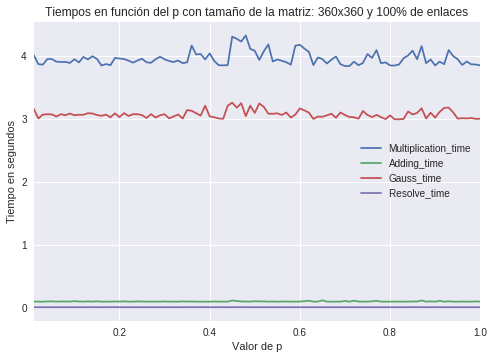

In [11]:
def plotRows(matrix_size):

    df = pd.read_csv(results_path+"time", delimiter=";")

    df = df.drop('Links',axis=1)
    df = df.drop('Rows', axis = 1)

    df = df.sort_values("P")


    ax = df.plot(x="P", logy=False)
    ax.set_ylabel("Tiempo en segundos")
    ax.set_xlabel("Valor de p")
    title = "Tiempos en función del p con tamaño de la matriz: "+str(matrix_size) + "x"+str(matrix_size)+ " y 100% de enlaces" 
    plt.title(title)
    plt.show()

plotRows(matrix_size)
